In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import pathlib
from typing import Tuple
import functools

In [2]:
ls ~/data/2D_recovery_studies/increased_covmatrix

all_2D/        s_0.2/  s_0.5/  s_0.8/   s_0.86/  s_0.92/  s_0.98/    z_blowup/
higher_stats/  s_0.3/  s_0.6/  s_0.82/  s_0.88/  s_0.94/  s_1/
s_0.1/         s_0.4/  s_0.7/  s_0.84/  s_0.9/   s_0.96/  y_blowup/


In [3]:
input_file_x = (
    str(pathlib.Path.home())
    + '/data/2D_recovery_studies/increased_covmatrix/s_0.98/truthMatchedDaVinciLog.h5'
)

input_file_y = (
    str(pathlib.Path.home())
    + '/data/2D_recovery_studies/increased_covmatrix/y_blowup/s_0.98/truthMatchedDaVinciLog.h5'
)

input_file_z = (
    str(pathlib.Path.home())
    + '/data/2D_recovery_studies/increased_covmatrix/z_blowup/s_0.98/truthMatchedDaVinciLog.h5'
)

In [4]:
save_plots = False

In [5]:
## Create plots directory, if missing
plots_dir = (str(pathlib.Path.home())
                  + '/vertex-reconstruction-studies/'
                  + 'plots/'
                  + 'studies_on_truth_matched_davinci_logs/'
                  + 'xyz_blowup_comparison/'
)
pathlib.Path(plots_dir).mkdir(parents=True, exist_ok=True)

# Import data

In [6]:
df_events_x = pd.read_hdf(input_file_x, key='LHCbMC_Lb')
df_events_x

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,pim_posMomCovMatrix_3_5,pim_posMomCovMatrix_3_6,pim_posMomCovMatrix_4_4,pim_posMomCovMatrix_4_5,pim_posMomCovMatrix_4_6,pim_posMomCovMatrix_5_5,pim_posMomCovMatrix_5_6,pim_posMomCovMatrix_6_6,match_index,mismatch_perc
0,1.674753,0.053259,0.004623,461.983261,-78.247981,6504.222043,1.6747,0.0532,0.0037,4601.051416,...,3.142560e+03,3.145090e+03,17.4188,-2.138120e+02,-2.140240e+02,7.316260e+04,7.322090e+04,73279.2,0,0.000030
1,0.880395,-0.130333,15.654301,209.545799,199.243538,4381.083975,0.8804,-0.1302,15.6547,745.277623,...,9.031320e+03,9.376810e+03,43.3318,3.264650e+01,3.425470e+01,3.185940e+04,3.307610e+04,34339.4,1,0.000035
2,0.893069,-0.210212,27.346294,84.953310,-116.199707,5557.096303,0.8930,-0.2103,27.3459,627.274341,...,-2.886080e+04,-2.887930e+04,787.3740,-2.837230e+04,-2.839180e+04,1.099220e+06,1.099920e+06,1100620.0,4,0.000041
3,0.605714,-0.203049,22.148035,-202.498747,18.725639,3762.349599,0.6057,-0.2032,22.1485,-2766.567392,...,2.693930e+04,2.696010e+04,90.1864,5.198510e+03,5.202890e+03,6.694760e+05,6.699880e+05,670499.0,9,0.000034
4,0.636031,-0.090822,-65.799311,-207.686722,152.674077,7297.794399,0.6356,-0.0907,-65.7961,-1549.606044,...,-1.309440e+04,-1.310540e+04,201.6090,6.041500e+03,6.048110e+03,3.405920e+05,3.408790e+05,341166.0,11,0.000040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,1.101831,-0.738614,67.996588,380.401838,-66.608245,5851.400767,1.1019,-0.7389,67.9972,9191.521537,...,-7.604910e+01,-7.603710e+01,9.2567,-3.611000e+00,-3.618250e+00,2.082420e+03,2.082010e+03,2081.6,10380,20.640507
1209,1.101831,-0.738614,67.996588,380.401838,-66.608245,5851.400767,1.1019,-0.7389,67.9972,9191.521537,...,-7.604910e+01,-7.603710e+01,9.2567,-3.611000e+00,-3.618250e+00,2.082420e+03,2.082010e+03,2081.6,10382,22.826082
1210,1.101831,-0.738614,67.996588,380.401838,-66.608245,5851.400767,1.1019,-0.7389,67.9972,9191.521537,...,-1.279750e+04,-1.286660e+04,38.5827,-1.849800e+03,-1.859920e+03,1.120670e+05,1.126720e+05,113279.0,4793,23.093881
1211,0.759246,-0.783205,68.533907,-20.006221,-456.343834,6363.973976,0.7591,-0.7829,68.5325,-4289.573985,...,2.821250e+06,2.826850e+06,525617.0000,-8.721530e+06,-8.738940e+06,1.451330e+08,1.454210e+08,145709000.0,10386,0.000040


In [7]:
df_events_y = pd.read_hdf(input_file_y, key='LHCbMC_Lb')
df_events_y

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,pim_posMomCovMatrix_3_5,pim_posMomCovMatrix_3_6,pim_posMomCovMatrix_4_4,pim_posMomCovMatrix_4_5,pim_posMomCovMatrix_4_6,pim_posMomCovMatrix_5_5,pim_posMomCovMatrix_5_6,pim_posMomCovMatrix_6_6,match_index,mismatch_perc
0,1.674753,0.053259,0.004623,461.983261,-78.247981,6504.222043,1.6747,0.0532,0.0037,4601.051416,...,3142.56,3145.09,17.4188,-2.138120e+02,-2.140240e+02,73162.6,73220.9,73279.2,0,0.000030
1,0.880395,-0.130333,15.654301,209.545799,199.243538,4381.083975,0.8804,-0.1302,15.6547,745.277623,...,9031.32,9376.81,43.3318,3.264650e+01,3.425470e+01,31859.4,33076.1,34339.4,1,0.000035
2,0.893069,-0.210212,27.346294,84.953310,-116.199707,5557.096303,0.8930,-0.2103,27.3459,627.274341,...,-28860.80,-28879.30,787.3740,-2.837230e+04,-2.839180e+04,1099220.0,1099920.0,1100620.0,4,0.000041
3,0.636031,-0.090822,-65.799311,-207.686722,152.674077,7297.794399,0.6356,-0.0907,-65.7961,-1549.606044,...,-13094.40,-13105.40,201.6090,6.041500e+03,6.048110e+03,340592.0,340879.0,341166.0,11,0.000040
4,0.986496,-0.173897,54.366690,133.523208,3.904319,6612.102919,0.9868,-0.1738,54.3579,1604.194414,...,13094.50,13103.20,70.6920,1.017340e+03,1.018390e+03,346428.0,346658.0,346889.0,12,0.000034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,1.101364,-0.737077,67.994382,363.661658,-55.080362,5695.448012,1.1019,-0.7389,67.9972,10606.205807,...,-22402.00,-22457.50,62.7731,-3.803330e+03,-3.812820e+03,252021.0,252644.0,253269.0,10383,0.000044
1239,1.101364,-0.737077,67.994382,363.661658,-55.080362,5695.448012,1.1019,-0.7389,67.9972,10606.205807,...,-4307.51,-4319.34,32.7535,-1.153530e+03,-1.156850e+03,56049.1,56201.2,56353.8,10379,0.000032
1240,1.101364,-0.737077,67.994382,363.661658,-55.080362,5695.448012,1.1019,-0.7389,67.9972,10606.205807,...,-22402.00,-22457.50,62.7731,-3.803330e+03,-3.812820e+03,252021.0,252644.0,253269.0,10385,0.000036
1241,0.759246,-0.783205,68.533907,-20.006221,-456.343834,6363.973976,0.7591,-0.7829,68.5325,-4289.573985,...,2821250.00,2826850.00,525617.0000,-8.721530e+06,-8.738940e+06,145133000.0,145421000.0,145709000.0,10386,0.000040


In [8]:
df_events_z = pd.read_hdf(input_file_z, key='LHCbMC_Lb')
df_events_z

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,pim_posMomCovMatrix_3_5,pim_posMomCovMatrix_3_6,pim_posMomCovMatrix_4_4,pim_posMomCovMatrix_4_5,pim_posMomCovMatrix_4_6,pim_posMomCovMatrix_5_5,pim_posMomCovMatrix_5_6,pim_posMomCovMatrix_6_6,match_index,mismatch_perc
0,1.674753,0.053259,0.004623,461.983261,-78.247981,6504.222043,1.6747,0.0532,0.0037,4601.051416,...,3142.56,3145.09,17.4188,-2.138120e+02,-2.140240e+02,73162.6,73220.9,73279.2,0,0.000030
1,0.880395,-0.130333,15.654301,209.545799,199.243538,4381.083975,0.8804,-0.1302,15.6547,745.277623,...,9031.32,9376.81,43.3318,3.264650e+01,3.425470e+01,31859.4,33076.1,34339.4,1,0.000035
2,0.893069,-0.210212,27.346294,84.953310,-116.199707,5557.096303,0.8930,-0.2103,27.3459,627.274341,...,-28860.80,-28879.30,787.3740,-2.837230e+04,-2.839180e+04,1099220.0,1099920.0,1100620.0,4,0.000041
3,0.605712,-0.203043,22.148030,-204.696740,18.912832,3801.145534,0.6057,-0.2032,22.1485,-2772.780174,...,26939.30,26960.10,90.1864,5.198510e+03,5.202890e+03,669476.0,669988.0,670499.0,9,0.000034
4,0.636031,-0.090822,-65.799311,-207.686722,152.674077,7297.794399,0.6356,-0.0907,-65.7961,-1549.606044,...,-13094.40,-13105.40,201.6090,6.041500e+03,6.048110e+03,340592.0,340879.0,341166.0,11,0.000040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,1.102002,-0.738529,67.994842,417.663023,-71.699471,6060.194347,1.1019,-0.7389,67.9972,767.906431,...,-22402.00,-22457.50,62.7731,-3.803330e+03,-3.812820e+03,252021.0,252644.0,253269.0,10384,20.640930
1260,1.102002,-0.738529,67.994842,417.663023,-71.699471,6060.194347,1.1019,-0.7389,67.9972,767.906431,...,-2638.93,-2640.41,23.8941,-9.467890e+02,-9.474590e+02,71973.2,72012.8,72052.4,5563,27.830591
1261,1.102002,-0.738529,67.994842,417.663023,-71.699471,6060.194347,1.1019,-0.7389,67.9972,767.906431,...,-10306.20,-10315.70,87.4525,-3.670550e+03,-3.674370e+03,242274.0,242494.0,242715.0,7191,23.141933
1262,0.759246,-0.783205,68.533907,-20.006221,-456.343834,6363.973976,0.7591,-0.7829,68.5325,-4289.573985,...,2821250.00,2826850.00,525617.0000,-8.721530e+06,-8.738940e+06,145133000.0,145421000.0,145709000.0,10386,0.000040


## Merge info

In [9]:
merge_columns = [
    'p_refPoint_X',
    'p_refPoint_Y',
    'p_refPoint_Z',
    'p_momentum_X',
    'p_momentum_Y',
    'p_momentum_Z',
    'p_posMomCovMatrix_0_0',
    'p_posMomCovMatrix_0_1',
    'p_posMomCovMatrix_0_2',
    'p_posMomCovMatrix_0_3',
    'p_posMomCovMatrix_0_4',
    'p_posMomCovMatrix_0_5',
    'p_posMomCovMatrix_0_6',
    'p_posMomCovMatrix_1_1',
    'p_posMomCovMatrix_1_2',
    'p_posMomCovMatrix_1_3',
    'p_posMomCovMatrix_1_4',
    'p_posMomCovMatrix_1_5',
    'p_posMomCovMatrix_1_6',
    'p_posMomCovMatrix_2_2',
    'p_posMomCovMatrix_2_3',
    'p_posMomCovMatrix_2_4',
    'p_posMomCovMatrix_2_5',
    'p_posMomCovMatrix_2_6',
    'p_posMomCovMatrix_3_3',
    'p_posMomCovMatrix_3_4',
    'p_posMomCovMatrix_3_5',
    'p_posMomCovMatrix_3_6',
    'p_posMomCovMatrix_4_4',
    'p_posMomCovMatrix_4_5',
    'p_posMomCovMatrix_4_6',
    'p_posMomCovMatrix_5_5',
    'p_posMomCovMatrix_5_6',
    'p_posMomCovMatrix_6_6',
    'pim_refPoint_X',
    'pim_refPoint_Y',
    'pim_refPoint_Z',
    'pim_momentum_X',
    'pim_momentum_Y',
    'pim_momentum_Z',
    'pim_posMomCovMatrix_0_0',
    'pim_posMomCovMatrix_0_1',
    'pim_posMomCovMatrix_0_2',
    'pim_posMomCovMatrix_0_3',
    'pim_posMomCovMatrix_0_4',
    'pim_posMomCovMatrix_0_5',
    'pim_posMomCovMatrix_0_6',
    'pim_posMomCovMatrix_1_1',
    'pim_posMomCovMatrix_1_2',
    'pim_posMomCovMatrix_1_3',
    'pim_posMomCovMatrix_1_4',
    'pim_posMomCovMatrix_1_5',
    'pim_posMomCovMatrix_1_6',
    'pim_posMomCovMatrix_2_2',
    'pim_posMomCovMatrix_2_3',
    'pim_posMomCovMatrix_2_4',
    'pim_posMomCovMatrix_2_5',
    'pim_posMomCovMatrix_2_6',
    'pim_posMomCovMatrix_3_3',
    'pim_posMomCovMatrix_3_4',
    'pim_posMomCovMatrix_3_5',
    'pim_posMomCovMatrix_3_6',
    'pim_posMomCovMatrix_4_4',
    'pim_posMomCovMatrix_4_5',
    'pim_posMomCovMatrix_4_6',
    'pim_posMomCovMatrix_5_5',
    'pim_posMomCovMatrix_5_6',
    'pim_posMomCovMatrix_6_6',
    'MCTRUTH_Lb_ENDVERTEX_X',
    'MCTRUTH_Lb_ENDVERTEX_Y',
    'MCTRUTH_Lb_ENDVERTEX_Z',
    'MCTRUTH_L_ENDVERTEX_X',
    'MCTRUTH_L_ENDVERTEX_Y',
    'MCTRUTH_L_ENDVERTEX_Z',
    'MCTRUTH_p_PX',
    'MCTRUTH_p_PY',
    'MCTRUTH_p_PZ',
    'MCTRUTH_pim_PX',
    'MCTRUTH_pim_PY',
    'MCTRUTH_pim_PZ',
    'MCTRUTH_mum_PX',
    'MCTRUTH_mum_PY',
    'MCTRUTH_mum_PZ',
    'MCTRUTH_mup_PX',
    'MCTRUTH_mup_PY',
    'MCTRUTH_mup_PZ',
    'MCTRUTH_Lb_ID',
    'MCTRUTH_L_ID',
    'MCTRUTH_Lb_Reconstructible',
    'MCTRUTH_L_Reconstructible',
    'MCTRUTH_p_Reconstructible',
    'MCTRUTH_pim_Reconstructible',
    'MCTRUTH_Jpsi_Reconstructible',
    'MCTRUTH_mup_Reconstructible',
    'MCTRUTH_mum_Reconstructible',
    'MCTRUTH_Lb_Reconstructed',
    'MCTRUTH_L_Reconstructed',
    'MCTRUTH_p_Reconstructed',
    'MCTRUTH_pim_Reconstructed',
    'MCTRUTH_Jpsi_Reconstructed',
    'MCTRUTH_mup_Reconstructed',
    'MCTRUTH_mum_Reconstructed'
]

First isolate events converging with the pure VF. Some get lost, but very few.

In [10]:
df_common_x = df_events_x.loc[df_events_x['seed_vtx_2D'].isnull(), :]
df_common_y = df_events_y.loc[df_events_y['seed_vtx_2D'].isnull(), :]
df_common_z = df_events_z.loc[df_events_z['seed_vtx_2D'].isnull(), :]

df_to_merge = [df_common_x, df_common_y, df_common_z]

## Only use merge columns in right DF. We only keep results from df_common_x, no problem because
## the algorithm is the same in all cases.
df_common_VF = functools.reduce(
    lambda left, right: pd.merge(left, right[merge_columns], on=merge_columns, how='inner'),
    df_to_merge)

del(df_common_x)
del(df_common_y)
del(df_common_z)
del(df_to_merge)

Now isolate events pertaining to each algorithm.

In [11]:
df_exclusive_x = df_events_x.loc[~df_events_x['seed_vtx_2D'].isnull(), :]
df_exclusive_y = df_events_y.loc[~df_events_y['seed_vtx_2D'].isnull(), :]
df_exclusive_z = df_events_z.loc[~df_events_z['seed_vtx_2D'].isnull(), :]

Now perform an *outer* merge of our three dataframes.

In [12]:
dic_VF = {}
dic_2DX = {}
dic_2DY = {}
dic_2DZ = {}

for element in merge_columns:
    dic_VF[element + '_VF'] = element
    dic_2DX[element + '_2DX'] = element
    dic_2DY[element + '_2DY'] = element
    dic_2DZ[element + '_2DZ'] = element

In [13]:
df_common_VF = df_common_VF.add_suffix('_VF')
df_common_VF.rename(columns=dic_VF, inplace=True)

df_exclusive_x = df_exclusive_x.add_suffix('_2DX')
df_exclusive_x.rename(columns=dic_2DX, inplace=True)

df_exclusive_y = df_exclusive_y.add_suffix('_2DY')
df_exclusive_y.rename(columns=dic_2DY, inplace=True)

df_exclusive_z = df_exclusive_z.add_suffix('_2DZ')
df_exclusive_z.rename(columns=dic_2DZ, inplace=True)

In [14]:
df_tmp = df_common_VF.merge(df_exclusive_x, on=merge_columns, how='outer', suffixes=[None, None])
df_tmp = df_tmp.merge(df_exclusive_y, on=merge_columns, how='outer', suffixes=[None, None])
df_events = df_tmp.merge(df_exclusive_z, on=merge_columns, how='outer', suffixes=[None, None])

del(df_tmp)

In [15]:
is_VF = ~df_events['Lb_ENDVERTEX_X_VF'].isnull()
is_2DX = ~df_events['Lb_ENDVERTEX_X_2DX'].isnull()
is_2DY = ~df_events['Lb_ENDVERTEX_X_2DY'].isnull()
is_2DZ = ~df_events['Lb_ENDVERTEX_X_2DZ'].isnull()

df_events.loc[is_VF & ~is_2DX & ~is_2DY & ~is_2DZ, 'algorithm'] = 'VF'
df_events.loc[is_VF & (is_2DX | is_2DY | is_2DZ), 'algorithm'] = 'weird'
df_events.loc[~is_VF & is_2DX & ~is_2DY & ~is_2DZ, 'algorithm'] = 'x'
df_events.loc[~is_VF & ~is_2DX & is_2DY & ~is_2DZ, 'algorithm'] = 'y'
df_events.loc[~is_VF & ~is_2DX & ~is_2DY & is_2DZ, 'algorithm'] = 'z'
df_events.loc[~is_VF & is_2DX & is_2DY & ~is_2DZ, 'algorithm'] = 'xy'
df_events.loc[~is_VF & is_2DX & ~is_2DY & is_2DZ, 'algorithm'] = 'xz'
df_events.loc[~is_VF & ~is_2DX & is_2DY & is_2DZ, 'algorithm'] = 'yz'
df_events.loc[~is_VF & is_2DX & is_2DY & is_2DZ, 'algorithm'] = 'xyz'

In [16]:
df_events

,Lb_ENDVERTEX_X_VF,Lb_ENDVERTEX_Y_VF,Lb_ENDVERTEX_Z_VF,L_ENDVERTEX_X_VF,L_ENDVERTEX_Y_VF,L_ENDVERTEX_Z_VF,Jpsi_ENDVERTEX_X_VF,Jpsi_ENDVERTEX_Y_VF,Jpsi_ENDVERTEX_Z_VF,L_PX_VF,...,seed_vtx_Z_2DZ,seed_ci_0_0_2DZ,seed_ci_0_1_2DZ,seed_ci_0_2_2DZ,seed_ci_1_1_2DZ,seed_ci_1_2_2DZ,seed_ci_2_2_2DZ,match_index_2DZ,mismatch_perc_2DZ,algorithm
0,1.674753,0.053259,0.004623,461.983261,-78.247981,6504.222043,1.6747,0.0532,0.0037,4601.051416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VF
1,0.880395,-0.130333,15.654301,209.545799,199.243538,4381.083975,0.8804,-0.1302,15.6547,745.277623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VF
2,0.893069,-0.210212,27.346294,84.953310,-116.199707,5557.096303,0.8930,-0.2103,27.3459,627.274341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VF
3,0.636031,-0.090822,-65.799311,-207.686722,152.674077,7297.794399,0.6356,-0.0907,-65.7961,-1549.606044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VF
4,0.986496,-0.173897,54.366690,133.523208,3.904319,6612.102919,0.9868,-0.1738,54.3579,1604.194414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5969.94,0.017525,-0.000039,0.001665,0.000091,-0.000106,0.000897,8691.0,0.000043,z
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6333.95,0.022245,0.000705,-0.000875,0.000141,-0.000079,0.000290,9938.0,0.000045,z
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5280.40,0.014452,-0.000413,-0.001821,0.000090,0.000082,0.003198,10286.0,0.000030,z
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14504.40,0.096058,-0.004375,0.005612,0.000882,-0.000153,0.000417,10384.0,20.640930,z


# Recovered events

## Fraction of *total* events reconstructed by each algorithm

In [17]:
print("Tot. number of events:\t\t\t\t", len(df_events))
print("Reconstructed with standard Vertex Fitter:\t", "{:.2%}".format(sum(df_events['algorithm'] == 'VF')/len(df_events)))
print()
print("Reconstructed with 2D algo, x-blowup:\t\t", "{:.2%}".format(sum(df_events['algorithm'].str.contains('x'))/len(df_events)))
print("Reconstructed with 2D algo, y-blowup:\t\t", "{:.2%}".format(sum(df_events['algorithm'].str.contains('y'))/len(df_events)))
print("Reconstructed with 2D algo, z-blowup:\t\t", "{:.2%}".format(sum(df_events['algorithm'].str.contains('z'))/len(df_events)))
print()
print("Reconstructed with 2D algo, either x or y:\t", "{:.2%}".format(sum(
    df_events['algorithm'].str.contains('x') | df_events['algorithm'].str.contains('y')
)/len(df_events)))
print("Reconstructed with 2D algo, either x or z:\t", "{:.2%}".format(sum(
    df_events['algorithm'].str.contains('x') | df_events['algorithm'].str.contains('z')
)/len(df_events)))
print("Reconstructed with 2D algo, either y or z:\t", "{:.2%}".format(sum(
    df_events['algorithm'].str.contains('y') | df_events['algorithm'].str.contains('z')
)/len(df_events)))
print()
print("Reconstructed with 2D, x only:\t\t\t", "{:.2%}".format(sum(df_events['algorithm'] == 'x')/len(df_events)))
print("Reconstructed with 2D, y only:\t\t\t", "{:.2%}".format(sum(df_events['algorithm'] == 'y')/len(df_events)))
print("Reconstructed with 2D, z only:\t\t\t", "{:.2%}".format(sum(df_events['algorithm'] == 'z')/len(df_events)))
print("Reconstructed with 2D, both x and y:\t\t", "{:.2%}".format(sum(df_events['algorithm'] == 'xy')/len(df_events)))
print("Reconstructed with 2D, both x and z:\t\t", "{:.2%}".format(sum(df_events['algorithm'] == 'xz')/len(df_events)))
print("Reconstructed with 2D, both y and z:\t\t", "{:.2%}".format(sum(df_events['algorithm'] == 'yz')/len(df_events)))
print("Reconstructed with 2D, all (xyz):\t\t", "{:.2%}".format(sum(df_events['algorithm'] == 'xyz')/len(df_events)))

Tot. number of events:				 1312
Reconstructed with standard Vertex Fitter:	 78.73%

Reconstructed with 2D algo, x-blowup:		 13.26%
Reconstructed with 2D algo, y-blowup:		 15.78%
Reconstructed with 2D algo, z-blowup:		 16.92%

Reconstructed with 2D algo, either x or y:	 20.12%
Reconstructed with 2D algo, either x or z:	 19.36%
Reconstructed with 2D algo, either y or z:	 19.97%

Reconstructed with 2D, x only:			 1.30%
Reconstructed with 2D, y only:			 1.91%
Reconstructed with 2D, z only:			 1.14%
Reconstructed with 2D, both x and y:		 1.14%
Reconstructed with 2D, both x and z:		 3.05%
Reconstructed with 2D, both y and z:		 4.95%
Reconstructed with 2D, all (xyz):		 7.77%


## Fraction of *additional* events reconstructed by each algorithm

In [18]:
tot_additional = sum(df_events['algorithm'] != 'VF')
print("Tot. number of recovered events:\t\t", tot_additional)
print()
print("Reconstructed with 2D algo, x-blowup:\t\t", "{:.2%}".format(sum(df_events['algorithm'].str.contains('x'))/tot_additional))
print("Reconstructed with 2D algo, y-blowup:\t\t", "{:.2%}".format(sum(df_events['algorithm'].str.contains('y'))/tot_additional))
print("Reconstructed with 2D algo, z-blowup:\t\t", "{:.2%}".format(sum(df_events['algorithm'].str.contains('z'))/tot_additional))
print()
print("Reconstructed with 2D algo, either x or y:\t", "{:.2%}".format(sum(
    df_events['algorithm'].str.contains('x') | df_events['algorithm'].str.contains('y')
)/tot_additional))
print("Reconstructed with 2D algo, either x or z:\t", "{:.2%}".format(sum(
    df_events['algorithm'].str.contains('x') | df_events['algorithm'].str.contains('z')
)/tot_additional))
print("Reconstructed with 2D algo, either y or z:\t", "{:.2%}".format(sum(
    df_events['algorithm'].str.contains('y') | df_events['algorithm'].str.contains('z')
)/tot_additional))
print()
print("Reconstructed with 2D, x only:\t\t\t", "{:.2%}".format(sum(df_events['algorithm'] == 'x')/tot_additional))
print("Reconstructed with 2D, y only:\t\t\t", "{:.2%}".format(sum(df_events['algorithm'] == 'y')/tot_additional))
print("Reconstructed with 2D, z only:\t\t\t", "{:.2%}".format(sum(df_events['algorithm'] == 'z')/tot_additional))
print("Reconstructed with 2D, only x and y:\t\t", "{:.2%}".format(sum(df_events['algorithm'] == 'xy')/tot_additional))
print("Reconstructed with 2D, only x and z:\t\t", "{:.2%}".format(sum(df_events['algorithm'] == 'xz')/tot_additional))
print("Reconstructed with 2D, only y and z:\t\t", "{:.2%}".format(sum(df_events['algorithm'] == 'yz')/tot_additional))
print("Reconstructed with 2D, all (xyz):\t\t", "{:.2%}".format(sum(df_events['algorithm'] == 'xyz')/tot_additional))

Tot. number of recovered events:		 279

Reconstructed with 2D algo, x-blowup:		 62.37%
Reconstructed with 2D algo, y-blowup:		 74.19%
Reconstructed with 2D algo, z-blowup:		 79.57%

Reconstructed with 2D algo, either x or y:	 94.62%
Reconstructed with 2D algo, either x or z:	 91.04%
Reconstructed with 2D algo, either y or z:	 93.91%

Reconstructed with 2D, x only:			 6.09%
Reconstructed with 2D, y only:			 8.96%
Reconstructed with 2D, z only:			 5.38%
Reconstructed with 2D, only x and y:		 5.38%
Reconstructed with 2D, only x and z:		 14.34%
Reconstructed with 2D, only y and z:		 23.30%
Reconstructed with 2D, all (xyz):		 36.56%


# Performance distribution of the three algorithms

In [19]:
contains_X = df_events['algorithm'].str.contains('x')
contains_Y = df_events['algorithm'].str.contains('y')
contains_Z = df_events['algorithm'].str.contains('z')
is_XYZ = df_events['algorithm'] == 'xyz'

In [20]:
def plot_three_overlapping_histograms(
    series_A: pd.Series,
    label_A: str,
    series_B: pd.Series,
    label_B: str,
    series_C: pd.Series,
    label_C: str,
    axis_label: str,
    plot_title: str,
    file_name: str,
    binning: int,
    boundaries: Tuple[float],
    log_scale: bool = False,
    scientific_notation: bool = False,
    normalized: bool = True,
    hist_type: str = 'stepfilled'
) -> None:
    ## 3D-converged events
    plt.hist(
        series_A,
        bins=binning,
        range=boundaries,
        label=label_A,
        histtype=hist_type,
        edgecolor='tab:red',
        color=mcolors.to_rgba('tab:red', alpha=0.05),
        density=normalized
    )
    
    plt.hist(
        series_B,
        bins=binning,
        range=boundaries,
        label=label_B,
        histtype=hist_type,
        edgecolor='tab:blue',
        color=mcolors.to_rgba('tab:blue', alpha=0.05),
        density=normalized
    )
    
    plt.hist(
        series_C,
        bins=binning,
        range=boundaries,
        label=label_C,
        histtype=hist_type,
        edgecolor='black',
        color=mcolors.to_rgba('black', alpha=0.05),
        density=normalized
    )
        
    plt.grid()
    plt.xlabel(axis_label)
    plt.title(plot_title)
    
    if log_scale:
        plt.yscale('log')

    if normalized:
        plt.ylabel("Probability density")
    else:
        plt.ylabel("Events")
    
    plt.legend()
    
    if scientific_notation:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
    if save_plots:
        plt.savefig(plots_dir + file_name + '.pdf', bbox_inches='tight')
    
    plt.show()

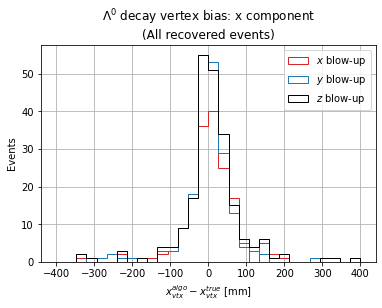

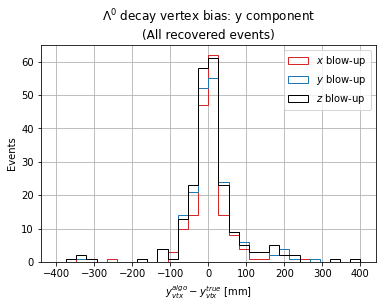

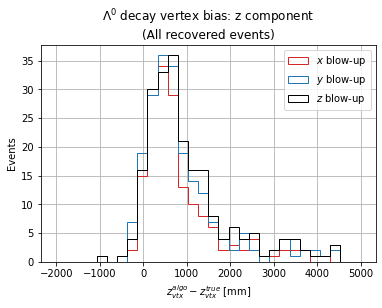

In [21]:
bias_boundary_dictionary = {
    'x': (-400,400),
    'y': (-400,400),
    'z': (-2000,5000),
}

for comp in ['x', 'y', 'z']:
    plot_args = {
        'axis_label': '$' + comp + '^{algo}_{vtx} - ' + comp + '^{true}_{vtx}$ [mm]',
        'plot_title': '$\Lambda^0$ decay vertex bias: ' + comp + " component" + '\n(All recovered events)',
        'file_name': 'Lambda_endvertex_' + comp + '_bias',
        'binning': 30,
        'boundaries': bias_boundary_dictionary[comp],
        'log_scale': False,
        'scientific_notation': False,
        'normalized': False,
        'hist_type': 'step'
    }

    plot_three_overlapping_histograms(
        (df_events['L_ENDVERTEX_' + comp.upper() + '_2DX'] - df_events['MCTRUTH_L_ENDVERTEX_' + comp.upper()]).loc[contains_X],
        '$x$ blow-up',
        (df_events['L_ENDVERTEX_' + comp.upper() + '_2DY'] - df_events['MCTRUTH_L_ENDVERTEX_' + comp.upper()]).loc[contains_Y],
        '$y$ blow-up',
        (df_events['L_ENDVERTEX_' + comp.upper() + '_2DZ'] - df_events['MCTRUTH_L_ENDVERTEX_' + comp.upper()]).loc[contains_Z],
        '$z$ blow-up',
        **plot_args)

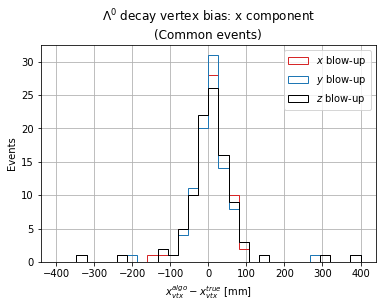

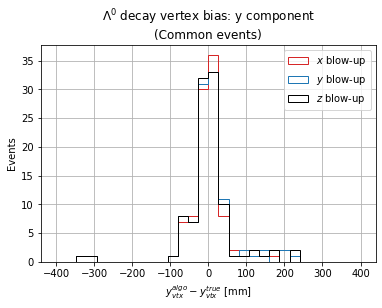

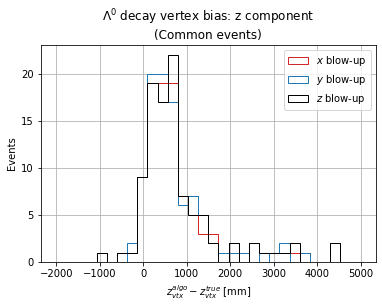

In [22]:
bias_boundary_dictionary = {
    'x': (-400,400),
    'y': (-400,400),
    'z': (-2000,5000),
}

for comp in ['x', 'y', 'z']:
    plot_args = {
        'axis_label': '$' + comp + '^{algo}_{vtx} - ' + comp + '^{true}_{vtx}$ [mm]',
        'plot_title': '$\Lambda^0$ decay vertex bias: ' + comp + " component" + '\n(Common events)',
        'file_name': 'Lambda_endvertex_' + comp + '_bias',
        'binning': 30,
        'boundaries': bias_boundary_dictionary[comp],
        'log_scale': False,
        'scientific_notation': False,
        'normalized': False,
        'hist_type': 'step'
    }

    plot_three_overlapping_histograms(
        (df_events['L_ENDVERTEX_' + comp.upper() + '_2DX'] - df_events['MCTRUTH_L_ENDVERTEX_' + comp.upper()]).loc[is_XYZ],
        '$x$ blow-up',
        (df_events['L_ENDVERTEX_' + comp.upper() + '_2DY'] - df_events['MCTRUTH_L_ENDVERTEX_' + comp.upper()]).loc[is_XYZ],
        '$y$ blow-up',
        (df_events['L_ENDVERTEX_' + comp.upper() + '_2DZ'] - df_events['MCTRUTH_L_ENDVERTEX_' + comp.upper()]).loc[is_XYZ],
        '$z$ blow-up',
        **plot_args)

# Performance of individual algorithms

In [23]:
print("x-algorithm mean chi2:\t", df_events.loc[contains_X, 'L_VFASPF_CHI2_VDOF_2DX'].mean())
print("x-algorithm median chi2:", df_events.loc[contains_X, 'L_VFASPF_CHI2_VDOF_2DX'].median())
print("x-algorithm chi2 std:\t", df_events.loc[contains_X, 'L_VFASPF_CHI2_VDOF_2DX'].std())

print()
series = (df_events['L_ENDVERTEX_Z_2DX'] - df_events['MCTRUTH_L_ENDVERTEX_Z']).loc[contains_X]

print("x-algorithm mean L0 vertex z bias:\t", series.mean())
print("x-algorithm median L0 vertex z bias:\t", series.median())
print("x-algorithm L0 vertex z bias std:\t", series.std())

x-algorithm mean chi2:	 2373.104333813271
x-algorithm median chi2: 4.909823033311865
x-algorithm chi2 std:	 22918.942480703558

x-algorithm mean L0 vertex z bias:	 840.5974708862219
x-algorithm median L0 vertex z bias:	 583.9892447376706
x-algorithm L0 vertex z bias std:	 1493.268149310376


In [24]:
print("y-algorithm mean chi2:\t", df_events.loc[contains_Y, 'L_VFASPF_CHI2_VDOF_2DY'].mean())
print("y-algorithm median chi2:", df_events.loc[contains_Y, 'L_VFASPF_CHI2_VDOF_2DY'].median())
print("y-algorithm chi2 std:\t", df_events.loc[contains_Y, 'L_VFASPF_CHI2_VDOF_2DY'].std())

print()
series = (df_events['L_ENDVERTEX_Z_2DY'] - df_events['MCTRUTH_L_ENDVERTEX_Z']).loc[contains_Y]

print("y-algorithm mean L0 vertex z bias:\t", series.mean())
print("y-algorithm median L0 vertex z bias:\t", series.median())
print("y-algorithm L0 vertex z bias std:\t", series.std())

y-algorithm mean chi2:	 36.411124832866555
y-algorithm median chi2: 5.401459869000847
y-algorithm chi2 std:	 126.86905103655702

y-algorithm mean L0 vertex z bias:	 855.0001097592061
y-algorithm median L0 vertex z bias:	 635.1277784169924
y-algorithm L0 vertex z bias std:	 1380.6903895821486


In [25]:
print("z-algorithm mean chi2:\t", df_events.loc[contains_Z, 'L_VFASPF_CHI2_VDOF_2DZ'].mean())
print("z-algorithm median chi2:", df_events.loc[contains_Z, 'L_VFASPF_CHI2_VDOF_2DZ'].median())
print("z-algorithm chi2 std:\t", df_events.loc[contains_Z, 'L_VFASPF_CHI2_VDOF_2DZ'].std())

print()
series = (df_events['L_ENDVERTEX_Z_2DZ'] - df_events['MCTRUTH_L_ENDVERTEX_Z']).loc[contains_Z]

print("z-algorithm mean L0 vertex z bias:\t", series.mean())
print("z-algorithm median L0 vertex z bias:\t", series.median())
print("z-algorithm L0 vertex z bias std:\t", series.std())

z-algorithm mean chi2:	 807.0489332227495
z-algorithm median chi2: 7.815378193936321
z-algorithm chi2 std:	 11161.471286583857

z-algorithm mean L0 vertex z bias:	 1008.1034264421951
z-algorithm median L0 vertex z bias:	 696.8359511835565
z-algorithm L0 vertex z bias std:	 1457.0987452487261


# Performance of algorithms on comparable events
Meaning: compare results (e.g. $\tilde\chi^2$, $\Lambda^0$ vertex bias) for events wich are reconstructed with more algorithms

In [26]:
def plot_single_histogram(
    series: pd.Series,
    axis_label: str,
    plot_title: str,
    file_name: str,
    binning: int,
    boundaries: Tuple[float],
    log_scale: bool = False,
    scientific_notation: bool = False,
    normalized: bool = True,
    hist_type: str = 'stepfilled'
) -> None:
    ## 3D-converged events
    plt.hist(
        series,
        bins=binning,
        range=boundaries,
        histtype=hist_type,
        edgecolor='tab:blue',
        color=mcolors.to_rgba('tab:blue', alpha=0.05),
        density=normalized
    )
    
    plt.grid()
    plt.xlabel(axis_label)
    plt.title(plot_title)
    
    if log_scale:
        plt.yscale('log')

    if normalized:
        plt.ylabel("Probability density")
    else:
        plt.ylabel("Events")
       
    if scientific_notation:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
    if save_plots:
        plt.savefig(plots_dir + file_name + '.pdf', bbox_inches='tight')
    
    plt.show()

In [27]:
def z_bias_algorithm_comparison(
    algo_1: str,
    algo_2: str,
    algo_common_condition: pd.Series
) -> None:
    bias_boundary_dictionary = {
        'x': (-10,10),
        'y': (-10,10),
        'z': (-200,200)
    }

    for comp in ['x', 'y', 'z']:
        axis_label = (
            '$(' + comp + '^{' + algo_1 + '}_{vtx} - ' + comp + '^{true}_{vtx})'
            + '-'
            + '(' + comp + '^{' + algo_2 + '}_{vtx} - ' + comp + '^{true}_{vtx})$'
            + ' [mm]'
        )

        plot_args = {
            'axis_label': axis_label,
            'plot_title': '$\Lambda^0$ decay vertex bias: ' + comp + " component, " + algo_1 + " vs. " + algo_2 + ' error blow-up\n(Common events)',
            'file_name': 'Lambda_endvertex_' + comp + '_bias',
            'binning': 50,
            'boundaries': bias_boundary_dictionary[comp],
            'log_scale': False,
            'scientific_notation': False,
            'normalized': False,
        }

        series = (
            (df_events['L_ENDVERTEX_' + comp.upper() + '_2D' + algo_1.upper()] - df_events['MCTRUTH_L_ENDVERTEX_' + comp.upper()])
            -
            (df_events['L_ENDVERTEX_' + comp.upper() + '_2D' + algo_2.upper()] - df_events['MCTRUTH_L_ENDVERTEX_' + comp.upper()])
        ).loc[algo_common_condition]

        plot_single_histogram(series, **plot_args)

## X vs. Y

In [28]:
contains_X_Y = contains_X & contains_Y

In [29]:
print("x-algorithm mean chi2:\t", df_events.loc[contains_X_Y, 'L_VFASPF_CHI2_VDOF_2DX'].mean())
print("x-algorithm median chi2:", df_events.loc[contains_X_Y, 'L_VFASPF_CHI2_VDOF_2DX'].median())
print("x-algorithm chi2 std:\t", df_events.loc[contains_X_Y, 'L_VFASPF_CHI2_VDOF_2DX'].std())

x-algorithm mean chi2:	 23.64931619094272
x-algorithm median chi2: 3.548679766045659
x-algorithm chi2 std:	 103.76423129815205


In [30]:
print("y-algorithm mean chi2:\t", df_events.loc[contains_X_Y, 'L_VFASPF_CHI2_VDOF_2DY'].mean())
print("y-algorithm median chi2:", df_events.loc[contains_X_Y, 'L_VFASPF_CHI2_VDOF_2DY'].median())
print("y-algorithm chi2 std:\t", df_events.loc[contains_X_Y, 'L_VFASPF_CHI2_VDOF_2DY'].std())

y-algorithm mean chi2:	 22.720542846916974
y-algorithm median chi2: 3.57374039972133
y-algorithm chi2 std:	 99.50269024082088


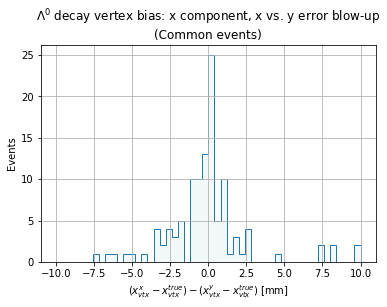

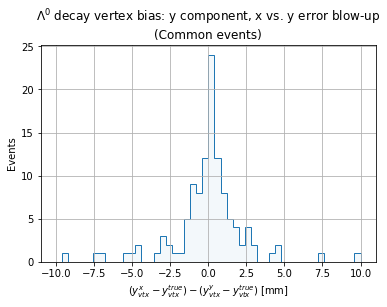

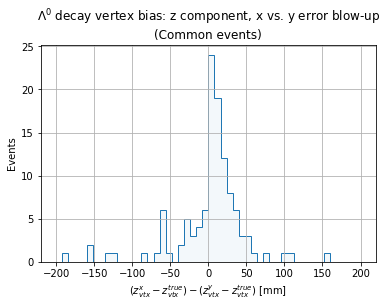

In [31]:
z_bias_algorithm_comparison('x', 'y', contains_X_Y)

Specifically for common events:

In [32]:
series = (df_events['L_ENDVERTEX_Z_2DX'] - df_events['MCTRUTH_L_ENDVERTEX_Z']).loc[contains_X_Y]

print("x-algorithm mean L0 vertex z bias:\t", series.mean())
print("x-algorithm median L0 vertex z bias:\t", series.median())
print("x-algorithm L0 vertex z bias std:\t", series.std())

x-algorithm mean L0 vertex z bias:	 685.7507916017827
x-algorithm median L0 vertex z bias:	 515.0636947855073
x-algorithm L0 vertex z bias std:	 1595.144645116638


In [33]:
series = (df_events['L_ENDVERTEX_Z_2DY'] - df_events['MCTRUTH_L_ENDVERTEX_Z']).loc[contains_X_Y]

print("y-algorithm mean L0 vertex z bias:\t", series.mean())
print("y-algorithm median L0 vertex z bias:\t", series.median())
print("y-algorithm L0 vertex z bias std:\t", series.std())

y-algorithm mean L0 vertex z bias:	 687.1272252368448
y-algorithm median L0 vertex z bias:	 531.6418342151846
y-algorithm L0 vertex z bias std:	 1592.0024314992208


## X vs. Z

In [34]:
contains_X_Z = contains_X & contains_Z

In [35]:
print("x-algorithm mean chi2:\t", df_events.loc[contains_X_Z, 'L_VFASPF_CHI2_VDOF_2DX'].mean())
print("x-algorithm median chi2:", df_events.loc[contains_X_Z, 'L_VFASPF_CHI2_VDOF_2DX'].median())
print("x-algorithm chi2 std:\t", df_events.loc[contains_X_Z, 'L_VFASPF_CHI2_VDOF_2DX'].std())

x-algorithm mean chi2:	 1973.917337561114
x-algorithm median chi2: 5.607337115039092
x-algorithm chi2 std:	 22906.34211027112


In [36]:
print("z-algorithm mean chi2:\t", df_events.loc[contains_X_Z, 'L_VFASPF_CHI2_VDOF_2DZ'].mean())
print("z-algorithm median chi2:", df_events.loc[contains_X_Z, 'L_VFASPF_CHI2_VDOF_2DZ'].median())
print("z-algorithm chi2 std:\t", df_events.loc[contains_X_Z, 'L_VFASPF_CHI2_VDOF_2DZ'].std())

z-algorithm mean chi2:	 1220.9197585597124
z-algorithm median chi2: 5.63475738521922
z-algorithm chi2 std:	 13955.410949310335


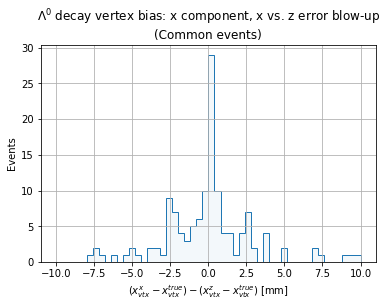

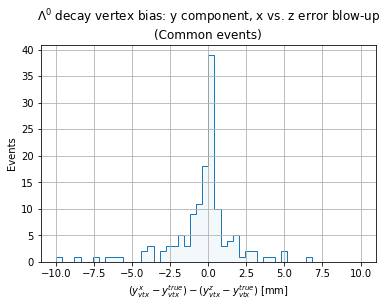

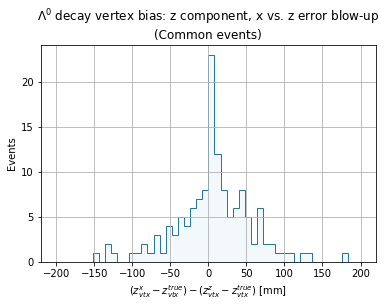

In [37]:
z_bias_algorithm_comparison('x', 'z', contains_X_Z)

Specifically for common events:

In [38]:
series = (df_events['L_ENDVERTEX_Z_2DX'] - df_events['MCTRUTH_L_ENDVERTEX_Z']).loc[contains_X_Z]

print("x-algorithm mean L0 vertex z bias:\t", series.mean())
print("x-algorithm median L0 vertex z bias:\t", series.median())
print("x-algorithm L0 vertex z bias std:\t", series.std())

x-algorithm mean L0 vertex z bias:	 838.9672532954913
x-algorithm median L0 vertex z bias:	 583.9892447376706
x-algorithm L0 vertex z bias std:	 1545.3462578647614


In [39]:
series = (df_events['L_ENDVERTEX_Z_2DZ'] - df_events['MCTRUTH_L_ENDVERTEX_Z']).loc[contains_X_Z]

print("z-algorithm mean L0 vertex z bias:\t", series.mean())
print("z-algorithm median L0 vertex z bias:\t", series.median())
print("z-algorithm L0 vertex z bias std:\t", series.std())

z-algorithm mean L0 vertex z bias:	 855.9093880897921
z-algorithm median L0 vertex z bias:	 594.6668547137599
z-algorithm L0 vertex z bias std:	 1545.0607993472559


## Y vs. Z

In [40]:
contains_Y_Z = contains_Y & contains_Z

In [41]:
print("y-algorithm mean chi2:\t", df_events.loc[contains_Y_Z, 'L_VFASPF_CHI2_VDOF_2DY'].mean())
print("y-algorithm median chi2:", df_events.loc[contains_Y_Z, 'L_VFASPF_CHI2_VDOF_2DY'].median())
print("y-algorithm chi2 std:\t", df_events.loc[contains_Y_Z, 'L_VFASPF_CHI2_VDOF_2DY'].std())

y-algorithm mean chi2:	 41.28954414299136
y-algorithm median chi2: 5.809046440881512
y-algorithm chi2 std:	 139.62769529193724


In [42]:
print("z-algorithm mean chi2:\t", df_events.loc[contains_Y_Z, 'L_VFASPF_CHI2_VDOF_2DZ'].mean())
print("z-algorithm median chi2:", df_events.loc[contains_Y_Z, 'L_VFASPF_CHI2_VDOF_2DZ'].median())
print("z-algorithm chi2 std:\t", df_events.loc[contains_Y_Z, 'L_VFASPF_CHI2_VDOF_2DZ'].std())

z-algorithm mean chi2:	 46.97599336930735
z-algorithm median chi2: 6.3493359348588205
z-algorithm chi2 std:	 180.29436196407886


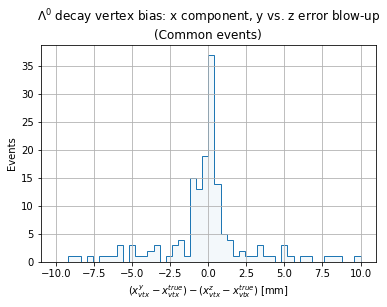

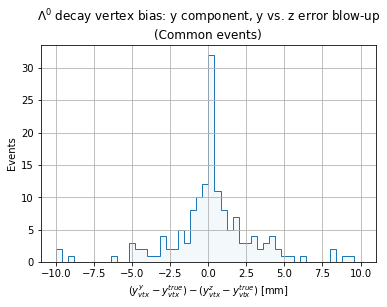

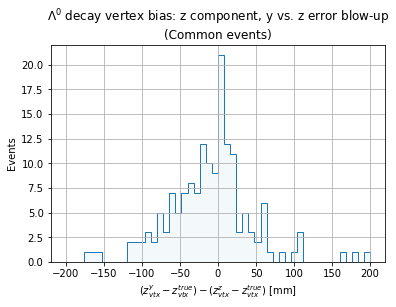

In [43]:
z_bias_algorithm_comparison('y', 'z', contains_Y_Z)

Specifically for common events:

In [44]:
series = (df_events['L_ENDVERTEX_Z_2DY'] - df_events['MCTRUTH_L_ENDVERTEX_Z']).loc[contains_Y_Z]

print("y-algorithm mean L0 vertex z bias:\t", series.mean())
print("y-algorithm median L0 vertex z bias:\t", series.median())
print("y-algorithm L0 vertex z bias std:\t", series.std())

y-algorithm mean L0 vertex z bias:	 918.3545976306701
y-algorithm median L0 vertex z bias:	 676.6507413921431
y-algorithm L0 vertex z bias std:	 1490.7203089052098


In [45]:
series = (df_events['L_ENDVERTEX_Z_2DZ'] - df_events['MCTRUTH_L_ENDVERTEX_Z']).loc[contains_Y_Z]

print("z-algorithm mean L0 vertex z bias:\t", series.mean())
print("z-algorithm median L0 vertex z bias:\t", series.median())
print("z-algorithm L0 vertex z bias std:\t", series.std())

z-algorithm mean L0 vertex z bias:	 927.898803911969
z-algorithm median L0 vertex z bias:	 663.1004825053037
z-algorithm L0 vertex z bias std:	 1499.8074862760407


## X vs. Y vs. Z

In [46]:
contains_X_Y_Z = contains_X & contains_Y & contains_Z

In [47]:
print("x-algorithm mean chi2:\t", df_events.loc[contains_X_Y_Z, 'L_VFASPF_CHI2_VDOF_2DX'].mean())
print("x-algorithm median chi2:", df_events.loc[contains_X_Y_Z, 'L_VFASPF_CHI2_VDOF_2DX'].median())
print("x-algorithm chi2 std:\t", df_events.loc[contains_X_Y_Z, 'L_VFASPF_CHI2_VDOF_2DX'].std())

x-algorithm mean chi2:	 26.126970771022723
x-algorithm median chi2: 4.118118842367081
x-algorithm chi2 std:	 110.86897526552202


In [48]:
print("y-algorithm mean chi2:\t", df_events.loc[contains_X_Y_Z, 'L_VFASPF_CHI2_VDOF_2DY'].mean())
print("y-algorithm median chi2:", df_events.loc[contains_X_Y_Z, 'L_VFASPF_CHI2_VDOF_2DY'].median())
print("y-algorithm chi2 std:\t", df_events.loc[contains_X_Y_Z, 'L_VFASPF_CHI2_VDOF_2DY'].std())

y-algorithm mean chi2:	 25.08248442451197
y-algorithm median chi2: 3.8562321781059397
y-algorithm chi2 std:	 106.31592096058412


In [49]:
print("z-algorithm mean chi2:\t", df_events.loc[contains_X_Y_Z, 'L_VFASPF_CHI2_VDOF_2DZ'].mean())
print("z-algorithm median chi2:", df_events.loc[contains_X_Y_Z, 'L_VFASPF_CHI2_VDOF_2DZ'].median())
print("z-algorithm chi2 std:\t", df_events.loc[contains_X_Y_Z, 'L_VFASPF_CHI2_VDOF_2DZ'].std())

z-algorithm mean chi2:	 26.550269564004388
z-algorithm median chi2: 4.214509404096061
z-algorithm chi2 std:	 111.2578528209402


In [50]:
series = (df_events['L_ENDVERTEX_Z_2DX'] - df_events['MCTRUTH_L_ENDVERTEX_Z']).loc[contains_X_Y_Z]

print("x-algorithm mean L0 vertex z bias:\t", series.mean())
print("x-algorithm median L0 vertex z bias:\t", series.median())
print("x-algorithm L0 vertex z bias std:\t", series.std())

x-algorithm mean L0 vertex z bias:	 720.2835275006588
x-algorithm median L0 vertex z bias:	 557.9256087703782
x-algorithm L0 vertex z bias std:	 1700.6955754992684


In [51]:
series = (df_events['L_ENDVERTEX_Z_2DY'] - df_events['MCTRUTH_L_ENDVERTEX_Z']).loc[contains_X_Y_Z]

print("y-algorithm mean L0 vertex z bias:\t", series.mean())
print("y-algorithm median L0 vertex z bias:\t", series.median())
print("y-algorithm L0 vertex z bias std:\t", series.std())

y-algorithm mean L0 vertex z bias:	 720.0969858039949
y-algorithm median L0 vertex z bias:	 534.9168519502009
y-algorithm L0 vertex z bias std:	 1698.006961090058


In [52]:
series = (df_events['L_ENDVERTEX_Z_2DZ'] - df_events['MCTRUTH_L_ENDVERTEX_Z']).loc[contains_X_Y_Z]

print("z-algorithm mean L0 vertex z bias:\t", series.mean())
print("z-algorithm median L0 vertex z bias:\t", series.median())
print("z-algorithm L0 vertex z bias std:\t", series.std())

z-algorithm mean L0 vertex z bias:	 729.9368105163493
z-algorithm median L0 vertex z bias:	 583.8297332765985
z-algorithm L0 vertex z bias std:	 1698.9945624852185


# Direct study of reconstructed events